In [1]:
import pandas as pd
%cd ..

/home/philippe/MolGenDocking


/home/philippe/miniconda3/envs/MolGen/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np




In [18]:
data_path = Path("data/sair_processed")
df = pd.concat(
    [pd.read_csv(f) for f in data_path.glob("*.csv")], ignore_index=True
)


df["volume_norm"] = df["width_x"] * df["width_y"] * df["width_z"] / 20 **3  # normalize by 20A^3
df["volume"] = df["volume_norm"] * 20 **3
df["log_n_ligand_poses"] = np.log10(df["n_ligand_poses"].astype(float))

df.sample(5)

,id,pocket_residues,cluster,center_x,center_y,center_z,width_x,width_y,width_z,n_ligand_poses,sequence,prot_id,avg_pIC50,avg_confidence,volume_norm,volume,log_n_ligand_poses
2498,sample_484632_model_0,"[<Residue CYS het= resseq=147 icode= >, <Resi...",1,-10.644025,8.977840,-6.992030,17.31927,20.989560,18.180340,137,MSGWARALLLAAVLVVMACLVPAATASLHAEETLTSQFAEFKQKHG...,P25779,7.910992,0.850758,0.826123,6608.987315,2.136721
810,sample_753642_model_0,"[<Residue TYR het= resseq=230 icode= >, <Resi...",1,-1.485450,3.194390,-20.498604,16.80044,19.916698,13.610109,136,MADDQGCIEEQGVEDSANEDSVDAKPDRSSFVPSLFSKKKKNVTMR...,P55210,7.913452,0.850414,0.569259,4554.068906,2.133539
1958,sample_1074305_model_0,"[<Residue TYR het= resseq=50 icode= >, <Resid...",1,-11.207640,-7.099510,-2.531665,17.73896,17.769280,16.378410,2,MAEVGSKSVLFVCLGNICRSPIAEAVFRKLVTDEKVSDNWRIDSAA...,Q9D358,7.792862,0.948953,0.645327,5162.614821,0.301030
3998,sample_19241_model_0,"[<Residue CYS het= resseq=668 icode= >, <Resi...",4,12.875560,4.743455,0.065875,15.04632,16.550870,14.846630,185,MAGPEGFQYRALYPFRRERPEDLELLPGDVLVVSRAALQALGVAEG...,O00459,7.747231,0.722687,0.462156,3697.251611,2.267172
2507,sample_498479_model_0,"[<Residue ARG het= resseq=43 icode= >, <Resid...",3,23.845661,10.758550,-8.820645,19.47406,19.539919,17.575090,2,MVGQLSEGAIAAIMQKGDTNIKPILQVINIRPITTGNSPPRYRLLM...,P27694,4.811677,0.781163,0.835963,6687.700576,0.301030


In [19]:
df

,id,pocket_residues,cluster,center_x,center_y,center_z,width_x,width_y,width_z,n_ligand_poses,sequence,prot_id,avg_pIC50,avg_confidence,volume_norm,volume,log_n_ligand_poses
0,sample_1106853_model_0,"[<Residue GLY het= resseq=431 icode= >, <Resi...",1,-2.495230,-1.502585,-0.661160,19.079880,23.530811,19.487999,11,MARKQNRNSKELGLVPLTDDTSHAGPPGPGRALLECDHLRSGVPGG...,Q9NRM0,7.121616,0.817137,1.093679,8749.430449,1.041393
1,sample_1106860_model_0,"[<Residue LEU het= resseq=75 icode= >, <Resid...",2,-6.077040,2.877165,-1.285365,15.577220,21.715050,17.079170,24,MARKQNRNSKELGLVPLTDDTSHAGPPGPGRALLECDHLRSGVPGG...,Q9NRM0,7.121616,0.817137,0.722150,5777.201943,1.380211
2,sample_1106901_model_0,"[<Residue ASP het= resseq=752 icode= >, <Resi...",1,-17.392740,7.100655,-28.123860,18.638718,18.972530,19.540200,10,MRPKTFPATTYSGNSRQRLQEIREGLKQPSKSSVQGLPAGPNSDTS...,Q9NRM7,8.265528,0.652567,0.863735,6909.876580,1.000000
3,sample_1106928_model_0,"[<Residue TRP het= resseq=242 icode= >, <Resi...",1,-8.443195,-9.593975,3.343045,17.052010,25.776829,18.803710,3,MALGACGLLLLLAVPGVSLRTLQPGCGRPQVSDAGGRIVGGHAAPA...,Q9NRR2,4.734036,0.839866,1.033139,8265.109541,0.477121
4,sample_1106948_model_0,"[<Residue GLN het= resseq=384 icode= >, <Resi...",1,-5.392380,17.283550,5.953655,19.740980,14.937260,15.656830,9,MLQDPDSDQPLNSLDVKPLRKPRIPMETFRKVGIPIIIALLSLASI...,Q9NRS4,4.894866,0.867894,0.577103,4616.825766,0.954243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,sample_1051948_model_0,"[<Residue LYS het= resseq=298 icode= >, <Resi...",3,5.314315,-9.640895,29.581192,19.307970,19.225191,15.857721,39,MAGCCAALAAFLFEYDTPRIVLIRSRKVGLMNRAVQLLILAYVIGW...,Q99571,6.872174,0.793535,0.735797,5886.376696,1.591065
5414,sample_1052394_model_0,"[<Residue LEU het= resseq=333 icode= >, <Resi...",1,12.872951,-8.849690,6.673870,17.924120,16.927600,15.925680,10,MPACCSCSDVFQYETNKVTRIQSMNYGTIKWFFHVIIFSYVCFALV...,Q99572,7.805849,0.746936,0.604006,4832.047735,1.000000
5415,sample_1052642_model_0,"[<Residue THR het= resseq=340 icode= >, <Resi...",2,-3.056945,-10.806680,-10.939600,13.382470,19.817380,9.641520,3,MPACCSCSDVFQYETNKVTRIQSMNYGTIKWFFHVIIFSYVCFALV...,Q99572,7.805849,0.746936,0.319623,2556.984068,0.477121
5416,sample_1052713_model_0,"[<Residue ASP het= resseq=92 icode= >, <Resid...",4,43.347603,7.668290,-27.176960,21.805660,17.955080,12.458181,354,MPACCSCSDVFQYETNKVTRIQSMNYGTIKWFFHVIIFSYVCFALV...,Q99572,7.805849,0.746936,0.609707,4877.656548,2.549003


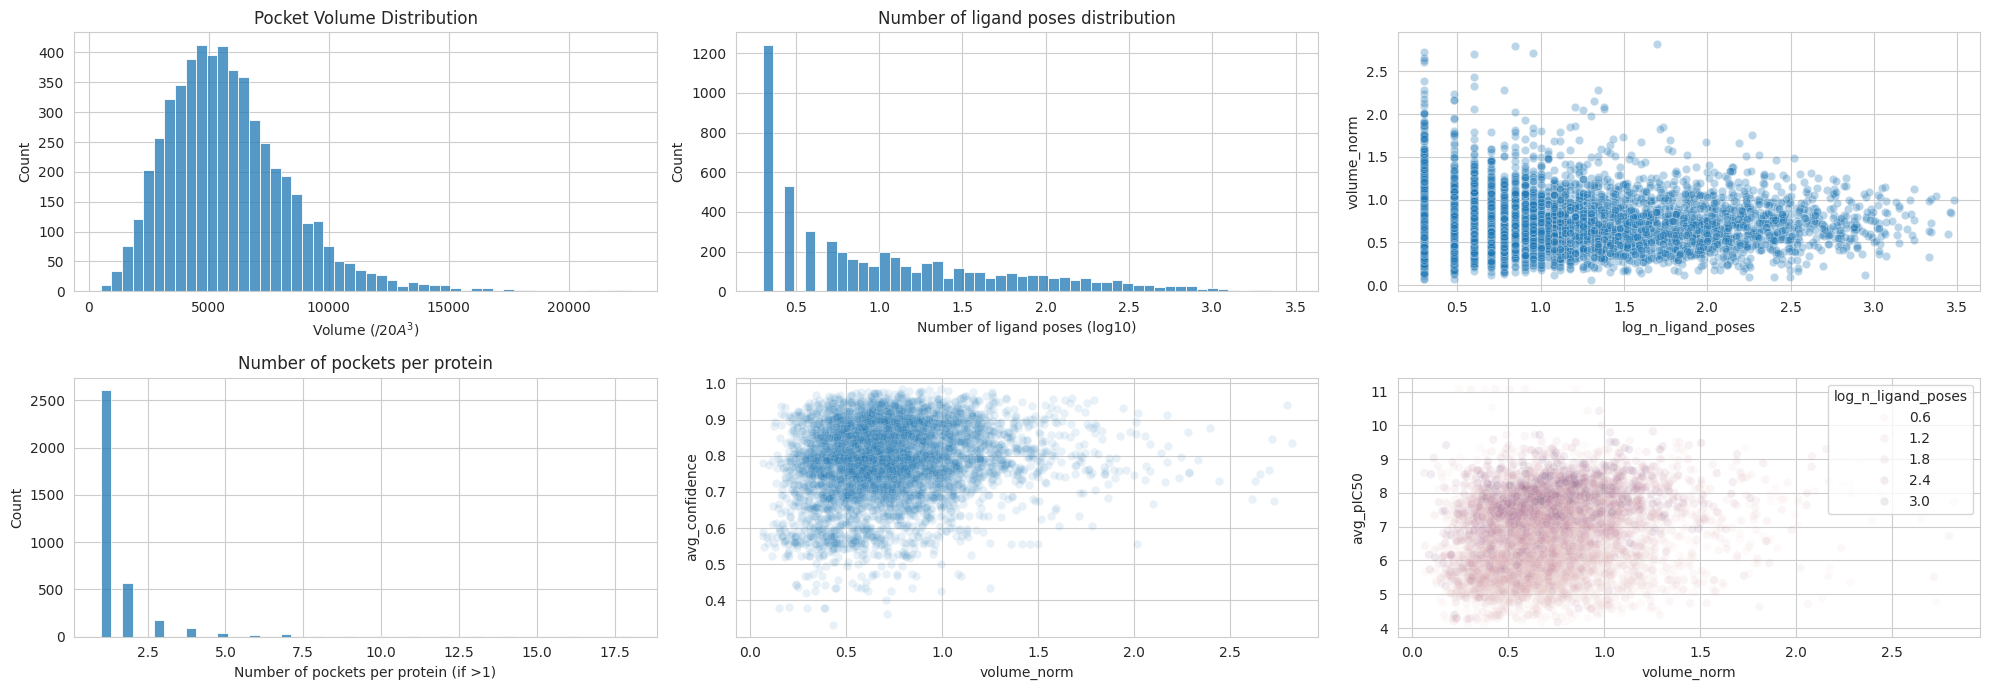

In [20]:

fig, axes = plt.subplots(2,3, figsize=(20,7))
axes = axes.flatten()
i = 0

sns.histplot(df["volume"], bins = 50, ax=axes[i])
axes[i].set_xlabel("Volume (/20$A^3$)")
axes[i].set_ylabel("Count")
axes[i].set_title("Pocket Volume Distribution")

i+=1
sns.histplot(df["log_n_ligand_poses"], bins = 50, ax=axes[i])
axes[i].set_xlabel("Number of ligand poses (log10)")
axes[i].set_ylabel("Count")
axes[i].set_title("Number of ligand poses distribution")


i+=1
sns.scatterplot(data=df, x="log_n_ligand_poses", y="volume_norm", ax=axes[i], alpha=0.3)

i+=1
prot_n_pocket = df.groupby("prot_id").size()
sns.histplot(prot_n_pocket, bins = 50, ax=axes[i])
axes[i].set_xlabel("Number of pockets per protein (if >1)")
axes[i].set_ylabel("Count")
axes[i].set_title("Number of pockets per protein")


i+=1
sns.scatterplot(data=df, x="volume_norm", y="avg_confidence",  ax=axes[i], alpha=0.1)

i+=1
sns.scatterplot(data=df, x="volume_norm", y="avg_pIC50",  hue="log_n_ligand_poses", ax=axes[i], alpha=0.1)

plt.tight_layout()

In [22]:
df.sort_values(by="volume", ascending=True)

,id,pocket_residues,cluster,center_x,center_y,center_z,width_x,width_y,width_z,n_ligand_poses,sequence,prot_id,avg_pIC50,avg_confidence,volume_norm,volume,log_n_ligand_poses
1877,sample_1065442_model_0,[<Residue TRP het= resseq=116 icode= >],3,-17.878471,-35.074287,35.851486,8.000000,8.00000,8.000000,20,MSVPGPYQAATGPSSAPSAPPSYEETVAVNSYYPTPPAPMPGPTTG...,Q99732,8.592855,0.588883,0.064000,512.000000,1.301030
4492,sample_400113_model_0,"[<Residue CYS het= resseq=215 icode= >, <Resi...",4,6.211240,5.776480,-1.214500,8.000000,8.34712,8.000000,3,MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRY...,P18031,6.421520,0.781153,0.066777,534.215680,0.477121
1036,sample_200635_model_0,"[<Residue LEU het= resseq=19 icode= >, <Resid...",13,-25.706050,8.953276,-7.188080,8.447802,8.00000,8.000000,2,MANLGCWMLVLFVATWSDLGLCKKRPKPGGWNTGGSRYPGQGSPGG...,P04156,5.655508,0.577635,0.067582,540.659328,0.301030
3339,sample_780584_model_0,"[<Residue SER het= resseq=18 icode= >, <Resid...",1,10.209320,-5.213485,8.103050,9.164141,8.00000,8.000000,2,MKISEEEVRHVAKLSKLSFSESETTTFATTLSKIVDMVELLNEVDT...,P68890,6.454664,0.547414,0.073313,586.505024,0.301030
2929,sample_870033_model_0,"[<Residue SER het= resseq=624 icode= >, <Resi...",50,28.990227,22.213280,-35.197205,11.111490,8.00000,8.000000,253,MPVRRGHVAPQNTFLDTIIRKFEGQSRKFIIANARVENCAVIYCND...,Q12809,6.170018,0.576601,0.088892,711.135360,2.403121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,sample_6255_model_0,"[<Residue PHE het= resseq=1318 icode= >, <Res...",1,-2.992520,5.643350,8.806945,26.165840,27.52118,30.000000,4,MSYDQGGNGNWQNTDPNGNYYYNGAENNEFYDQDYASQQPEQQQGG...,F5BCZ9,8.465000,0.761429,2.700430,21603.443775,0.602060
4164,sample_1000639_model_0,"[<Residue ILE het= resseq=219 icode= >, <Resi...",2,3.027050,-10.666405,5.041025,30.000000,24.79351,29.224910,9,MSVNYAAGLSPYADKGKCGLPEIFDPPEELERKVWELARLVWQSSS...,Q8N6T7,5.508795,0.846721,2.717205,21737.642950,0.954243
2007,sample_986469_model_0,"[<Residue LYS het= resseq=27 icode= >, <Resid...",1,3.880270,-4.032555,1.853945,30.000000,24.57597,29.618050,2,MSGDHLHNDSQIEADFRLNDSHKHKDKHKDREHRHKEHKKDKEKDR...,Q7YR26,4.769910,0.675595,2.729596,21836.769248,0.301030
2429,sample_803598_model_0,"[<Residue PHE het= resseq=191 icode= >, <Resi...",1,10.256460,4.301820,6.388526,29.925999,30.00000,24.915192,7,MVAPAGEQGRSSTALSDNPFDAKAWRLVDGFDDLTDITYHRHVDDA...,P9WNP5,6.721795,0.940734,2.796045,22368.360326,0.845098
